In [1]:
from bertopic import BERTopic
import pandas as pd
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from utils import clean_traffic


c:\Users\alkrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

def most_visited_topic_cluster(df,topics_count):
    topic_stats = df.groupby('topic')['traffic_numeric'].agg(['mean', 'median'])
    max = {"mean":0,"topic":None}
    r = range(0,topics_count)
    for i in r:
        element = topic_stats['mean'][i]
        comp = max["mean"]
        if element >= comp:
            max['mean'] = element
            max['topic'] = i
    return max

def max_element(List):
    list_max_element = 0
    for e in List:
        if e > list_max_element:
            list_max_element = e
    return list_max_element

In [5]:
# data = pd.read_csv("../../preprocessed_data/cleaned_data_USA.csv")    
# data = pd.read_csv("../preprocessed_data/cleaned_data_UK.csv")    
# data = pd.read_csv("../preprocessed_data/cleaned_data_CANADA.csv")    
# data = pd.read_csv("../preprocessed_data/cleaned_data_Denmark.csv")    
data = pd.read_csv("../../preprocessed_data/cleaned_data_Australia.csv")    


dataFrame = data[['newsTitle']]
strings_list = [item[0] for item in dataFrame.values.tolist()]
strings_list = [text for text in strings_list if detect(text) == "en"]
# strings_list = [text for text in strings_list if len(text.split()) > 3]



In [6]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(strings_list, show_progress_bar=True)

Batches: 100%|██████████| 72/72 [00:10<00:00,  7.14it/s]


In [7]:
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [8]:
hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [9]:
french_stop_words = ["le", "la", "les", "de", "du", "des", "et", "un", "une", "ce", "cette", "ces", "avec", "pour", "sur", "par"]

vectorizer_model = CountVectorizer(stop_words="english")

In [10]:

keybert_model = KeyBERTInspired()

pos_model = PartOfSpeech("en_core_web_sm")

mmr_model = MaximalMarginalRelevance(diversity=0.3)

representation_model = {
    "KeyBERT": keybert_model,
    "MMR": mmr_model,
    "POS": pos_model
}

In [11]:


topic_model = BERTopic(
embedding_model=embedding_model,
umap_model=umap_model,
hdbscan_model=hdbscan_model,
vectorizer_model=vectorizer_model,
representation_model=representation_model,
top_n_words=10,
verbose=True
)

topics, probs = topic_model.fit_transform(strings_list)
topic_model.update_topics(strings_list, n_gram_range=(1,3))

names = topic_model.get_topic_info().Name
topic_model.get_topic_info()

2024-12-10 21:26:55,747 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 72/72 [00:08<00:00,  8.16it/s]
2024-12-10 21:27:04,604 - BERTopic - Embedding - Completed ✓
2024-12-10 21:27:04,604 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-10 21:27:18,232 - BERTopic - Dimensionality - Completed ✓
2024-12-10 21:27:18,234 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-10 21:27:18,325 - BERTopic - Cluster - Completed ✓
2024-12-10 21:27:18,330 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-10 21:27:35,056 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,KeyBERT,MMR,POS,Representative_Docs
0,-1,932,-1_to_the_of_in,"[to, the, of, in, and, for, on, is, with, after]","[search, furious, murder, paul, reveals, websi...","[day, 2017, trump, says, australian, australia...","[new, life, video, season, family, things, fan...",[Love Actually secrets 23 things you may not k...
1,0,196,0_sydney_australia_melbourne_brisbane,"[sydney, australia, melbourne, brisbane, to, c...","[adelaide, brisbane, sydney, collingwood, nrl,...","[sydney, melbourne, brisbane, nrl, afl, perth,...","[cricket, win, big, victory, coach, late, derb...",[Live cricket scores Australia vs India Third ...
2,1,123,1_league_chelsea_madrid_premier,"[league, chelsea, madrid, premier, premier lea...","[arsenal, arsenals, bayern, tottenham, atletic...","[league, chelsea, champions, arsenal, liverpoo...","[league, champions, table, win, face, fourth, ...",[Champions League quarterfinal draw Bayern Mun...
3,2,78,2_trailer_the_new_of the,"[trailer, the, new, of the, of, star wars, war...","[trailer, teaser, sequel, guardians, cast, mar...","[trailer, guardians, marvel, spiderman, creed,...","[trailer, new, movie, war, review, superhero, ...",[Were Hooked on the Guardians of the Galaxy Vo...
4,3,71,3_ufc_fight_wwe_boxing,"[ufc, fight, wwe, boxing, mcgregor, results, c...","[ufc, conor, mayweather, boxing, mcgregor, flo...","[ufc, fight, boxing, mcgregor, conor, 209, wre...","[fight, boxing, results, time, theatres, title...",[UFC 209 results Tyson Pedro puts Paul Craig a...
5,4,70,4_dies_dead_dead at_at,"[dies, dead, dead at, at, actor, aged, dies at...","[deaths, dies, died, dead, death, overdose, ac...","[aged, actor, died, overdose, leukaemia, ricky...","[dead, aged, actor, star, death, car, leukaemi...",[Vinod Khanna India Bollywood actor dies of ca...
6,5,58,5_trump_donald_donald trump_trumps,"[trump, donald, donald trump, trumps, to, pres...","[trump, donald, trumps, trudeau, clinton, snl,...","[trump, media, yiannopoulos, milo, speech, ban...","[president, media, white, speech, social, poli...",[Also Donald Trump has time to meet with Kanye...
7,6,56,6_her_in_the_with,"[her, in, the, with, is, as, lena, weight, wei...","[johansson, alicia, lena, sylvia, megyn, scarl...","[lena, weight, emily, blonde, ashley, johansso...","[weight, loss, model, homophobic, blonde, slip...",[Who is the buxom blonde on Shane Warnes arm M...
8,7,53,7_baby_child_expecting_with,"[baby, child, expecting, with, liam, second ch...","[alexis, cheryl, liam, pregnant, megan, payne,...","[child, liam, pregnant, payne, daughters, cher...","[baby, child, pregnant, daughters, second, fat...",[Who is Alexis Ohanian Reddit cofounder expect...
9,8,50,8_open_australian open_australian_round,"[open, australian open, australian, round, ope...","[nadal, federer, djokovic, tennis, novak, will...","[open, nadal, 2017, tennis, venus, novak, fede...","[open, round, tennis, second, draw, seed, win,...",[Australian Open 2017 Venus Williams first thr...


In [ ]:
df = pd.DataFrame({'topic':topics, 'probs':probs})
df['date'] = data[['date']]
df['traffic'] = data[['traffic']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)
df


,topic,probs,date,traffic,traffic_numeric
0,3,0.923863,2016-11-28,"500,000+",500000
1,-1,0.000000,2016-11-28,"200,000+",200000
2,-1,0.000000,2016-11-28,"100,000+",100000
3,0,1.000000,2016-11-28,"200,000+",200000
4,-1,0.000000,2016-11-28,"200,000+",200000
...,...,...,...,...,...
2841,1,1.000000,2017-04-27,"50,000+",50000
2842,4,0.895495,2017-04-27,"100,000+",100000
2843,-1,0.000000,2017-04-27,"200,000+",200000
2844,11,0.795552,2017-04-27,"50,000+",50000


In [ ]:
max = most_visited_topic_cluster(df,max_element(topics))
print(max)
topic_stats = df.groupby('topic')['traffic_numeric'].agg(['mean', 'median']).sort_values('mean',ascending=False)
print(topic_stats['mean'])


{'mean': 708181.8181818182, 'topic': 41}
topic
 41    708181.818182
 36    523076.923077
 23    311304.347826
 8     296610.169492
 34    273333.333333
 4     254693.877551
 21    239583.333333
 3     235517.241379
 27    234500.000000
 38    223333.333333
 1     208288.770053
-1     198926.829268
 35    185384.615385
 15    176296.296296
 6     168965.517241
 12    168666.666667
 2     147885.714286
 0     147190.476190
 32    146470.588235
 37    140833.333333
 31    140000.000000
 11    135937.500000
 33    134705.882353
 28    132631.578947
 17    131538.461538
 5     129042.553191
 14    123448.275862
 10    122121.212121
 16    120384.615385
 40    117272.727273
 18    111153.846154
 30    107777.777778
 22    107391.304348
 9     105555.555556
 44    104000.000000
 24    101363.636364
 43     95000.000000
 19     94800.000000
 13     88620.689655
 25     88500.000000
 26     79500.000000
 39     67500.000000
 20     66666.666667
 7      66612.903226
 29     55789.473684
 42     

In [ ]:
topic_model.get_topic(max['topic'])

[('his money', 0.04742536840852208),
 ('riches', 0.04742536840852208),
 ('risk', 0.042619353829538936),
 ('money', 0.041073496547027945),
 ('100000', 0.026117566847922324),
 ('rags to', 0.026117566847922324),
 ('riches trip', 0.026117566847922324),
 ('recap risk management', 0.026117566847922324),
 ('paper tiger', 0.026117566847922324),
 ('of success', 0.026117566847922324)]

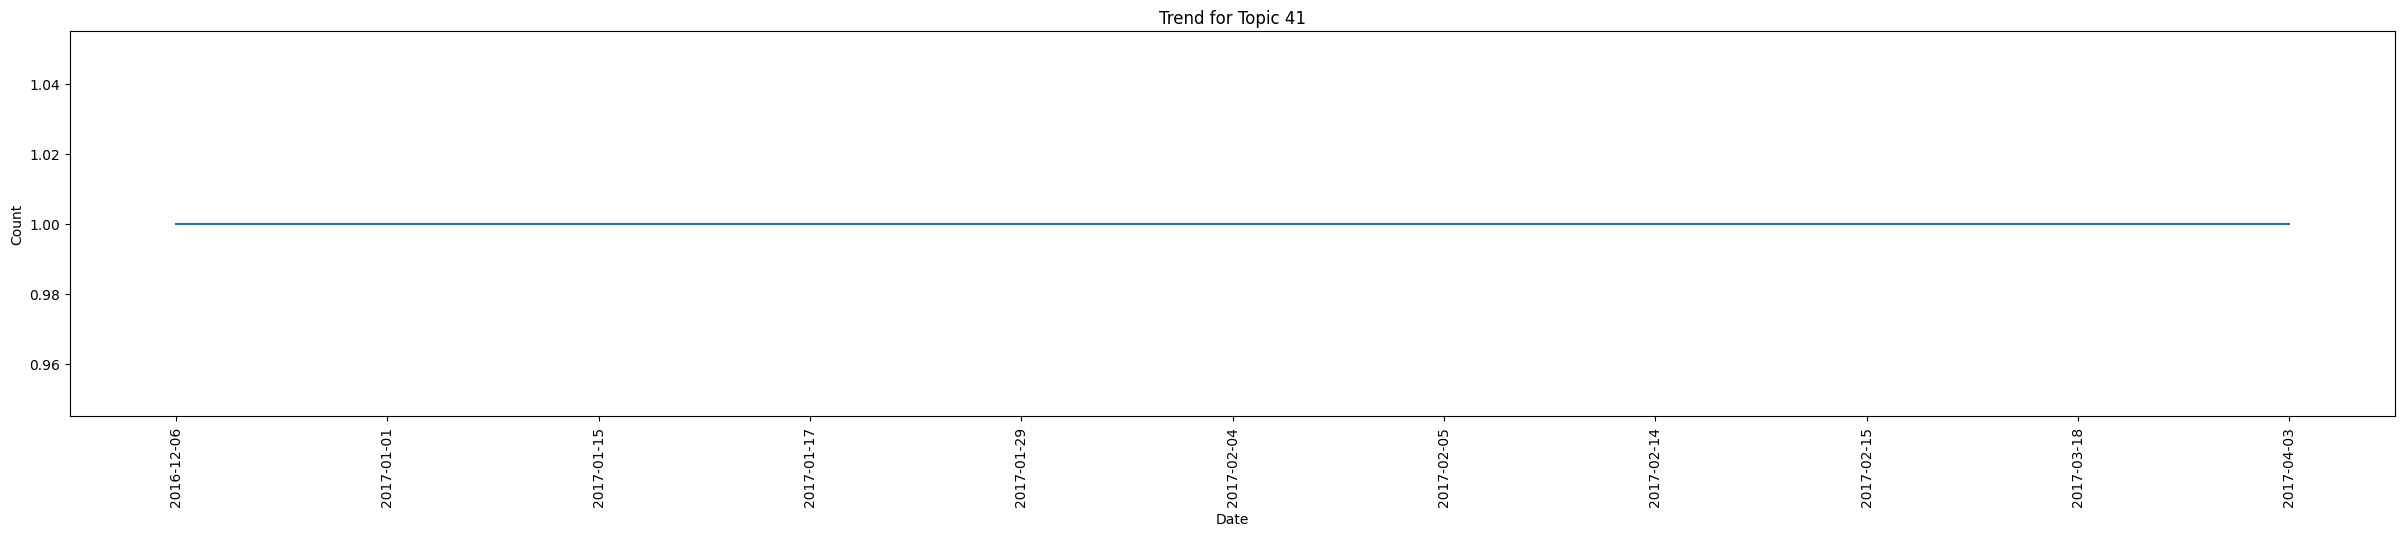

In [ ]:
topic_time_distribution = df.groupby(['date', 'topic']).size().reset_index(name='count')
specific_topic = max['topic']
specific_topic_data = topic_time_distribution[topic_time_distribution['topic'] == specific_topic]
plt.figure(figsize=(30, 5))
sns.lineplot(data=specific_topic_data, x='date', y='count')
plt.title(f"Trend for Topic {specific_topic}")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()




In [ ]:
names

0                                       -1_the_to_of_in
1                             0_nfl_to_super_super bowl
2                                     1_her_and_baby_is
3                     2_basketball_ncaa_tournament_bowl
4                          3_day_valentines_2017_easter
5                   4_warriors_lebron_lebron james_cavs
6                                5_dies_dies at_at_dead
7                      6_madrid_real_league_real madrid
8                         7_oscars_globes_golden_awards
9                             8_trailer_the_movie_logan
10                    9_foot_dustin_tiger woods_masters
11                   10_trump_donald_obama_donald trump
12                      11_nintendos_switch_pokémon_new
13                         12_police_shooting_killed_in
14                           13_ufc_fight_conor_results
15                          14_elon_musk_stock_earnings
16                15_arrested_released_in prison_prison
17                      16_recap_finale_premiere

In [ ]:
topic_model.visualize_topics()

In [ ]:
topics

[3,
 -1,
 -1,
 0,
 -1,
 8,
 9,
 -1,
 36,
 -1,
 -1,
 3,
 12,
 2,
 -1,
 3,
 -1,
 1,
 3,
 14,
 -1,
 1,
 10,
 15,
 -1,
 5,
 36,
 3,
 -1,
 -1,
 0,
 15,
 1,
 31,
 0,
 36,
 29,
 32,
 1,
 -1,
 1,
 4,
 -1,
 -1,
 1,
 5,
 4,
 -1,
 27,
 14,
 -1,
 28,
 -1,
 1,
 20,
 1,
 29,
 -1,
 24,
 29,
 25,
 13,
 29,
 -1,
 1,
 25,
 32,
 -1,
 15,
 -1,
 9,
 0,
 -1,
 9,
 4,
 -1,
 1,
 4,
 5,
 1,
 25,
 -1,
 -1,
 -1,
 -1,
 1,
 9,
 42,
 -1,
 -1,
 -1,
 1,
 -1,
 2,
 -1,
 2,
 8,
 43,
 5,
 1,
 8,
 2,
 -1,
 2,
 6,
 2,
 31,
 -1,
 8,
 2,
 2,
 2,
 2,
 6,
 5,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 2,
 0,
 -1,
 8,
 35,
 2,
 1,
 -1,
 3,
 -1,
 -1,
 0,
 12,
 -1,
 -1,
 32,
 4,
 -1,
 4,
 24,
 -1,
 8,
 1,
 8,
 -1,
 -1,
 17,
 6,
 -1,
 -1,
 7,
 -1,
 12,
 -1,
 5,
 2,
 -1,
 -1,
 5,
 5,
 -1,
 1,
 41,
 -1,
 -1,
 20,
 4,
 -1,
 25,
 5,
 12,
 15,
 22,
 2,
 37,
 25,
 -1,
 11,
 -1,
 -1,
 0,
 8,
 -1,
 20,
 43,
 -1,
 -1,
 16,
 37,
 5,
 -1,
 5,
 1,
 29,
 -1,
 25,
 8,
 1,
 -1,
 7,
 43,
 13,
 -1,
 18,
 2,
 1,
 1,
 9,
 -1,
 2,
 9,
 9,
 9,
 -